
# Visualization Tools: In-Class Demo

Concise, runnable examples for Matplotlib and Seaborn. Run top to bottom.


In [1]:
# Core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seaborn for statistical plots
import seaborn as sns

# Set a default Seaborn theme for demo clarity
sns.set_theme(style="whitegrid")
print("Libraries loaded.")

Libraries loaded.



## Why use tools: reproducibility and speed
- Same code = same figure. Parameters are recorded in the notebook.
- Change a parameter and re-run to see controlled changes.


In [2]:
# Synthetic data for consistent demos
rng = np.random.default_rng(42)
x = np.linspace(0, 10, 200)
y = np.sin(x) + 0.2 * rng.normal(size=x.size)

print("Data prepared:", x.shape, y.shape)

Data prepared: (200,) (200,)



## Matplotlib architecture: Figure → Axes → Elements
Object-oriented pattern using `plt.subplots()`.

Linestyle options:
- '-' → solid
- '--' → dashed
- '-.' → dash-dot
- ':' → dotted
- 'None' or '' → no line

Marker options:
- '.' → point
- 'o' → circle
- 's' → square
- '^' → triangle up
- 'v' → triangle down
- '+' → plus
- 'x' → cross
- '*' → star
- 'D' → diamond
- 'p' → pentagon
- 'None' or '' → no marker

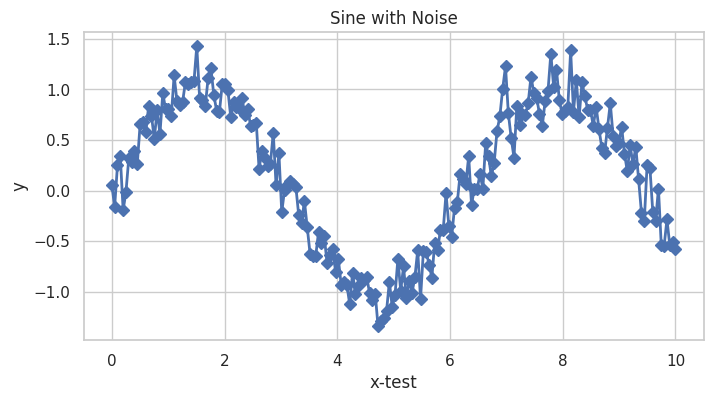

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, linestyle='-', marker='D', linewidth=2)
ax.set_title("Sine with Noise")
ax.set_xlabel("x-test")
ax.set_ylabel("y")
ax.grid(True)
plt.show()


## Subplots for comparisons
Use a grid when comparing variants.


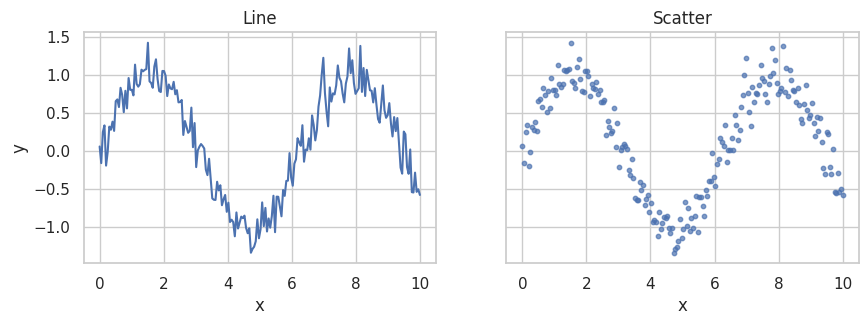

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

axes[0].plot(x, y, linestyle='-')
axes[0].set_title("Line")
axes[0].set_xlabel("x"); axes[0].set_ylabel("y")

axes[1].scatter(x, y, s=10, alpha=0.7)
axes[1].set_title("Scatter")
axes[1].set_xlabel("x")

for ax in axes: 
    ax.grid(True)
plt.show()


## Common Matplotlib patterns
`plot`, `scatter`, `bar`, `hist` and styling (`color`, `marker`, `linestyle`, `alpha`).  
Save output with `plt.savefig("chart.png", dpi=300)`.


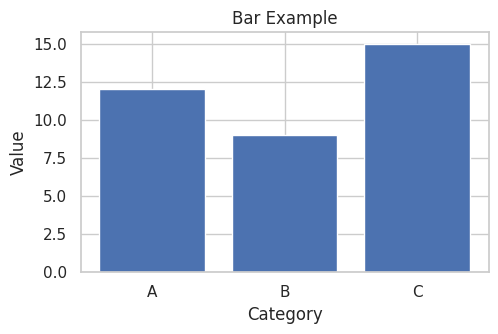

In [16]:
# Bar and hist examples
cats = ["A", "B", "C"]
vals = [12, 9, 15]

fig, ax = plt.subplots(figsize=(5, 3.5))
ax.bar(cats, vals)
ax.set_title("Bar Example")
ax.set_xlabel("Category")
ax.set_ylabel("Value")
plt.tight_layout()
plt.savefig("./data/bar_example.png", dpi=300)
plt.show()

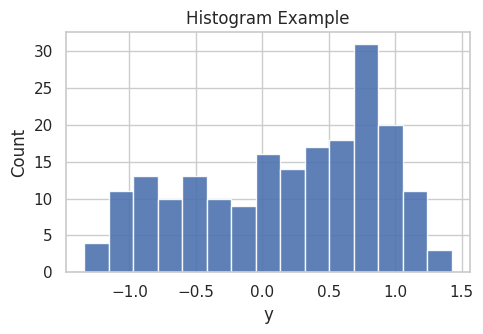

In [20]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.hist(y, bins=15, alpha=0.9)
ax.set_title("Histogram Example")
ax.set_xlabel("y"); ax.set_ylabel("Count")
plt.tight_layout()
plt.savefig("./data/hist_example.png", dpi=300)
plt.show()


## Seaborn: statistical layer on top of Matplotlib
Simplifies common workflows. Clean defaults. Themes: `darkgrid`, `whitegrid`, `ticks`.


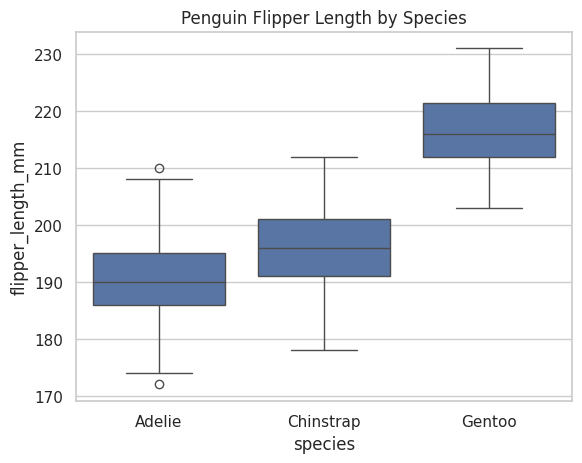

In [21]:
# Load a built-in dataset for reproducibility
penguins = sns.load_dataset("penguins").dropna()

# Boxplot summarizing distribution across groups
sns.boxplot(data=penguins, x="species", y="flipper_length_mm")
plt.title("Penguin Flipper Length by Species")
plt.show()

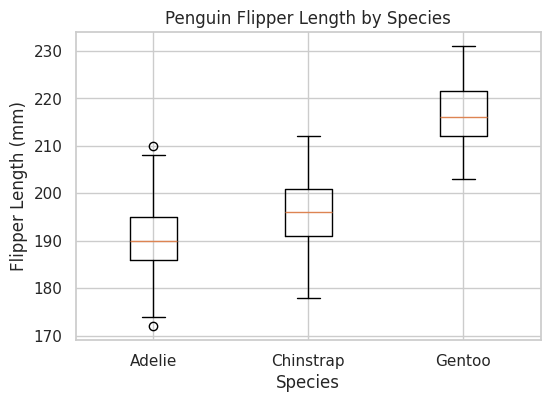

In [22]:
# Prepare groups
species = penguins["species"].unique()
data = [penguins[penguins["species"] == sp]["flipper_length_mm"] for sp in species]

# Boxplot in Matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(data, tick_labels=species)
ax.set_title("Penguin Flipper Length by Species")
ax.set_xlabel("Species")
ax.set_ylabel("Flipper Length (mm)")
plt.show()


## Common Seaborn patterns
- `sns.histplot()` for distributions  
- `sns.scatterplot()` for relationships  
- `sns.heatmap()` for correlation matrices  
- `sns.pairplot()` for quick multivariate view  
Grouping: `hue=`. Faceting: `col=` or `row=`.


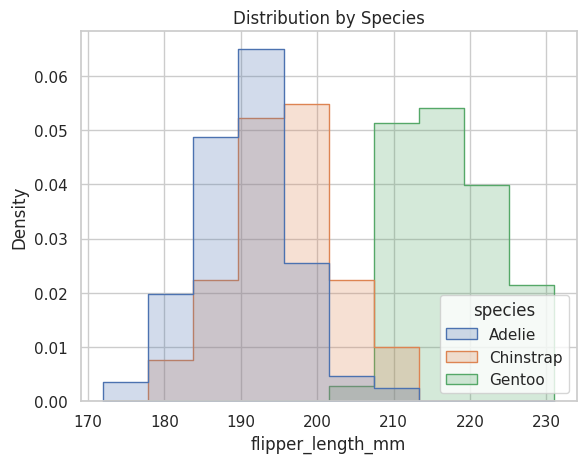

In [23]:
# Histplot with grouping via hue
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", element="step", stat="density", common_norm=False)
plt.title("Distribution by Species")
plt.show()

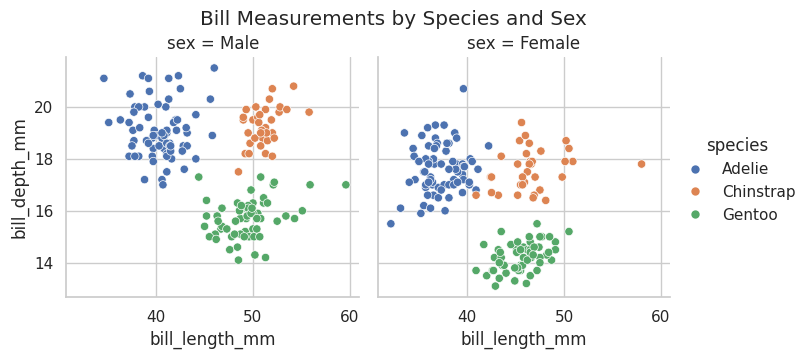

In [24]:
# Scatterplot with hue + faceting
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm",
    hue="species", col="sex",
    kind="scatter", height=3.5, aspect=1
)
plt.suptitle("Bill Measurements by Species and Sex", y=1.02)
plt.show()

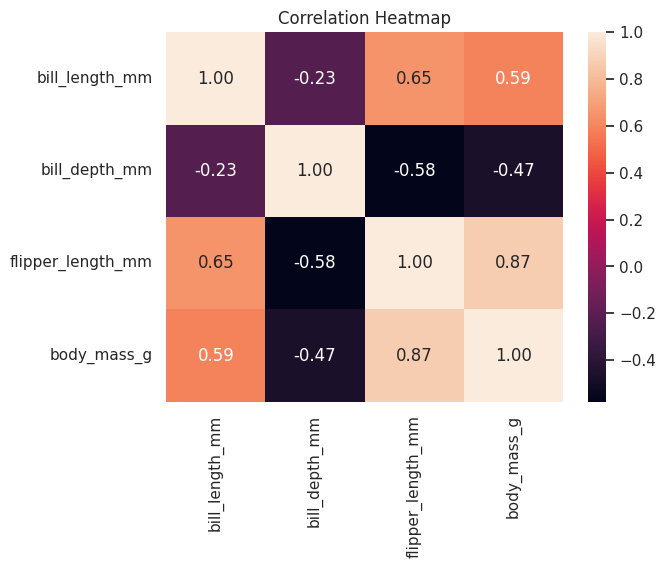

In [25]:
# Correlation heatmap
num_cols = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
corr = penguins[num_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

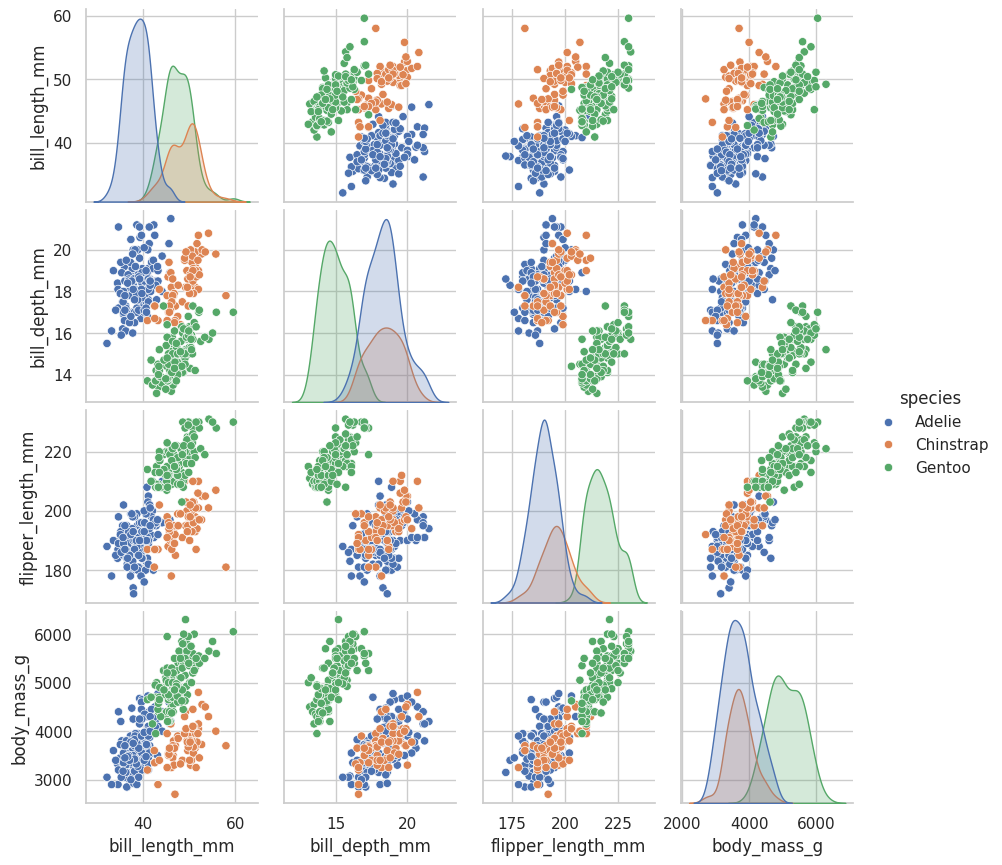

In [26]:
# Pairplot (quick overview)
sns.pairplot(penguins[num_cols + ["species"]], hue="species", height=2.2)
plt.show()